# Music Genre Classification with Neural Networks

We will explore the following:
    1. Preprocessing 
    2. Baseline Model
    3. Model Evaluation 
    4. Finetuning Model
        a) L1 and L2 Regularization 
        b) Drop-out Regularization

## 1. Preprocessing 

In [70]:
# import all necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score

In [71]:
# load the 3-second variation of the dataset and create a pandas dataframe
path_3_sec = ('../Data/features_3_sec.csv')
path_30_sec = ('../Data/features_3_sec.csv')
df = pd.read_csv(path)
df = df.drop(['filename','length'], axis=1)

df.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [72]:
#Before Applying one hot encoding, store the original labels
y_original = df["label"]
unique_labels = y_original.unique()
unique_labels

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [73]:
#Apply one-hot encoding to labels 
enc = OneHotEncoder(sparse=False)
y = enc.fit_transform(df[["label"]])
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [74]:
# apply min max scalar to scale values from 1-10
minmaxscalar = preprocessing.MinMaxScaler()
df.loc[:, df.columns != 'label'] = minmaxscalar.fit_transform(df.loc[:, df.columns != 'label'])

df.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,0.083164,...,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781,blues
1,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,0.051694,...,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548,blues
2,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,0.060820,...,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062,blues
3,0.399349,0.677066,0.298024,0.075042,0.238427,0.023187,0.455246,0.066234,0.329587,0.070906,...,0.067995,0.387474,0.050617,0.380430,0.050030,0.405824,0.041898,0.562204,0.034873,blues
4,0.355668,0.689113,0.322308,0.052149,0.233460,0.016451,0.451651,0.047830,0.318453,0.046916,...,0.042500,0.460314,0.083860,0.388590,0.076524,0.409019,0.020763,0.517913,0.031713,blues


In [75]:
#split data into 70:10:20 % for training, validation, and testing 

x,y = (df.iloc[:,df.columns != "label"],y)
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.30)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test,test_size=0.33)

print(X_test.shape,y_test.shape)

(2007, 57) (2007, 10)


##  Baseline Model

In [76]:
model = keras.Sequential()

model.add(keras.layers.Dense(512, activation = 'relu'))
model.add(keras.layers.Dense(256, activation = 'relu'))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, validation_data = (X_valid,y_valid))


Epoch 1/50
219/219 [==============================] - 3s 8ms/step - loss: 1.7637 - accuracy: 0.3372 - val_loss: 1.3364 - val_accuracy: 0.4758
Epoch 2/50
219/219 [==============================] - 1s 7ms/step - loss: 1.2883 - accuracy: 0.5198 - val_loss: 1.1835 - val_accuracy: 0.5485
Epoch 3/50
219/219 [==============================] - 1s 7ms/step - loss: 1.1602 - accuracy: 0.5709 - val_loss: 1.0437 - val_accuracy: 0.6162
Epoch 4/50
219/219 [==============================] - 1s 6ms/step - loss: 1.0530 - accuracy: 0.6135 - val_loss: 0.9470 - val_accuracy: 0.6677
Epoch 5/50
219/219 [==============================] - 2s 8ms/step - loss: 0.9700 - accuracy: 0.6454 - val_loss: 0.9265 - val_accuracy: 0.6576
Epoch 6/50
219/219 [==============================] - 1s 4ms/step - loss: 0.9329 - accuracy: 0.6657 - val_loss: 0.8737 - val_accuracy: 0.6838
Epoch 7/50
219/219 [==============================] - 1s 5ms/step - loss: 0.8551 - accuracy: 0.6908 - val_loss: 0.9140 - val_accuracy: 0.6606
Epoch 

## Model Evaluation

Evaluation of the models will consist of:
    1. Accuracy vs Epochs on Validation and Training Sets
    2. Loss vs Epochs on Validation and Training Sets
    3. Accuracy 
    4. Precision
    5. Recall 
    6. Confusion Matric 

In [77]:
hist_baseline = model.history

In [78]:
def plot_acc_err(hist):
    plt.figure(figsize=(20,15))
    fig, axs = plt.subplots(2)
    axs[0].plot(hist.history["accuracy"], label="train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    print("\n")
    # Error 
    axs[1].plot(hist.history["loss"], label="train error")
    axs[1].plot(hist.history["val_loss"], label="test error")    
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

<Figure size 1440x1080 with 0 Axes>

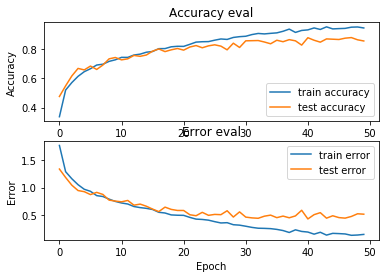

In [79]:
#1. Accuracy vs Epochs on Validation and Training Sets
#2. Loss vs Epochs on Validation and Training Sets
plot_acc_err(hist_baseline)

In [80]:
#evaluate accuracy on the test set 
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.5802 - accuracy: 0.8490


[0.580242931842804, 0.8490284085273743]

In [84]:
predictions = model.predict(X_test, batch_size=10, verbose=True)
preds = np.argmax(predictions,axis=1)
label = np.argmax(y_test,axis=1)
print(classification_report(label,preds))

201/201 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       217
           1       0.96      0.93      0.94       206
           2       0.80      0.80      0.80       215
           3       0.87      0.73      0.80       181
           4       0.82      0.90      0.86       206
           5       0.88      0.86      0.87       206
           6       0.90      0.94      0.92       196
           7       0.93      0.79      0.85       193
           8       0.92      0.77      0.84       204
           9       0.61      0.91      0.73       183

   micro avg       0.85      0.85      0.85      2007
   macro avg       0.86      0.85      0.85      2007
weighted avg       0.86      0.85      0.85      2007



In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("confusionmatrix.pdf")


Confusion matrix, without normalization
[[193   0   3   2   0   1   0   0   3   1]
 [  0 190   1   0   0  10   0   0   1   1]
 [  9   1 177   1   1   6   0   0   6   6]
 [  0   1   1 192   2   1   1   3  10   9]
 [  4   2   2   8 154   1   1   3  22   3]
 [ 11   8   9   1   0 168   0   0   0   1]
 [  5   0   0   2   7   0 168   0   1   6]
 [  0   1   4   4   8   1   0 153   7   6]
 [  4   0   1   1   4   2   0   1 194   2]
 [ 11   1  17  15   0   3   3   3   7 134]]


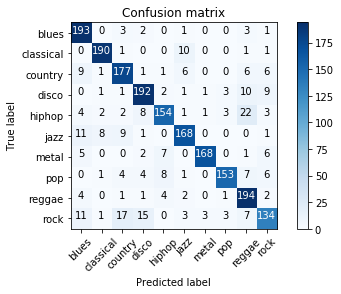

In [52]:
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(y_true=label,y_pred=preds)
label = list(unique_labels)
plot_confusion_matrix(cm, label,title='Confusion matrix')

## Model Finetuning 

### L1 and L2 regularization

In [85]:
model = keras.Sequential()

from tensorflow.keras import regularizers

model.add(keras.layers.Dense(512, activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(keras.layers.Dense(256, activation = 'relu' , kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(keras.layers.Dense(128, activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(keras.layers.Dense(64, activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(keras.layers.Dense(16, activation = 'relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(keras.layers.Dense(10, activation = 'softmax', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, validation_data = (X_valid,y_valid))

Epoch 1/50
219/219 [==============================] - 4s 9ms/step - loss: 1.8465 - accuracy: 0.3406 - val_loss: 1.4602 - val_accuracy: 0.4727
Epoch 2/50
219/219 [==============================] - 2s 7ms/step - loss: 1.4125 - accuracy: 0.4951 - val_loss: 1.2365 - val_accuracy: 0.5485
Epoch 3/50
219/219 [==============================] - 1s 6ms/step - loss: 1.3019 - accuracy: 0.5430 - val_loss: 1.1710 - val_accuracy: 0.5919
Epoch 4/50
219/219 [==============================] - 1s 6ms/step - loss: 1.2292 - accuracy: 0.5734 - val_loss: 1.1363 - val_accuracy: 0.6111
Epoch 5/50
219/219 [==============================] - 2s 8ms/step - loss: 1.1281 - accuracy: 0.6149 - val_loss: 1.0084 - val_accuracy: 0.6667
Epoch 6/50
219/219 [==============================] - 2s 10ms/step - loss: 1.0985 - accuracy: 0.6265 - val_loss: 1.1665 - val_accuracy: 0.6212
Epoch 7/50
219/219 [==============================] - 2s 9ms/step - loss: 1.0276 - accuracy: 0.6542 - val_loss: 0.9540 - val_accuracy: 0.6980
Epoch

<Figure size 1440x1080 with 0 Axes>

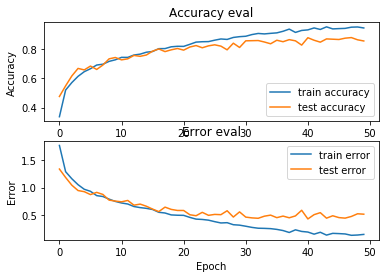

In [86]:
hist_l2_l1 = model.history
plot_acc_err(hist_baseline)

201/201 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       217
           1       0.93      0.97      0.95       206
           2       0.86      0.78      0.82       215
           3       0.74      0.87      0.80       181
           4       0.86      0.93      0.89       206
           5       0.91      0.86      0.88       206
           6       0.94      0.89      0.91       196
           7       0.90      0.79      0.84       193
           8       0.87      0.82      0.84       204
           9       0.74      0.68      0.71       183

   micro avg       0.86      0.86      0.86      2007
   macro avg       0.86      0.85      0.85      2007
weighted avg       0.86      0.86      0.85      2007

Confusion matrix, without normalization
[[207   0   4   2   1   0   0   0   1   2]
 [  0 200   0   0   0   3   1   0   0   2]
 [ 15   1 167   2   1   9   0   5   1  14]
 [  4   0   0 157

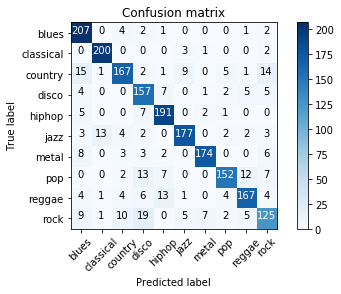

In [87]:
predictions = model.predict(X_test, batch_size=10, verbose=True)
preds = np.argmax(predictions,axis=1)
label = np.argmax(y_test,axis=1)
print(classification_report(label,preds))
cm = confusion_matrix(y_true=label,y_pred=preds)
label = list(unique_labels)
plot_confusion_matrix(cm, label,title='Confusion matrix')

### Dropout Regularization and He Intialization

In [88]:
model = keras.Sequential()

model.add(keras.layers.Dense(512, activation = "relu",kernel_initializer="he_normal"))

model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(256, activation = "relu", kernel_initializer="he_normal"))

model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Dense(128, activation = "relu", kernel_initializer="he_normal"))

model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Dense(64, activation = "relu", kernel_initializer="he_normal"))


model.add(keras.layers.Dense(10, activation = "softmax"))

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=60, validation_data = (X_valid,y_valid))

Epoch 1/60
219/219 [==============================] - 55s 10ms/step - loss: 1.6788 - accuracy: 0.3820 - val_loss: 1.2042 - val_accuracy: 0.5495
Epoch 2/60
219/219 [==============================] - 1s 7ms/step - loss: 1.2548 - accuracy: 0.5387 - val_loss: 0.9581 - val_accuracy: 0.6505
Epoch 3/60
219/219 [==============================] - 1s 7ms/step - loss: 1.0930 - accuracy: 0.6029 - val_loss: 0.8962 - val_accuracy: 0.6929
Epoch 4/60
219/219 [==============================] - 1s 7ms/step - loss: 1.0026 - accuracy: 0.6452 - val_loss: 0.8049 - val_accuracy: 0.7212
Epoch 5/60
219/219 [==============================] - 1s 7ms/step - loss: 0.9119 - accuracy: 0.6744 - val_loss: 0.7679 - val_accuracy: 0.7354
Epoch 6/60
219/219 [==============================] - 2s 7ms/step - loss: 0.8679 - accuracy: 0.6880 - val_loss: 0.7361 - val_accuracy: 0.7394
Epoch 7/60
219/219 [==============================] - 2s 8ms/step - loss: 0.8202 - accuracy: 0.7086 - val_loss: 0.6648 - val_accuracy: 0.7677
Epoc

219/219 [==============================] - 1s 7ms/step - loss: 0.1652 - accuracy: 0.9412 - val_loss: 0.2885 - val_accuracy: 0.9121
Epoch 59/60
219/219 [==============================] - 1s 6ms/step - loss: 0.1688 - accuracy: 0.9415 - val_loss: 0.2593 - val_accuracy: 0.9111
Epoch 60/60
219/219 [==============================] - 1s 7ms/step - loss: 0.1816 - accuracy: 0.9354 - val_loss: 0.3079 - val_accuracy: 0.9000


<Figure size 1440x1080 with 0 Axes>

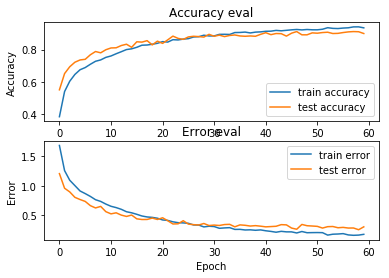

In [89]:
hist_dropout = model.history
plot_acc_err(hist_dropout)

201/201 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       217
           1       0.95      0.96      0.96       206
           2       0.88      0.85      0.87       215
           3       0.86      0.91      0.88       181
           4       0.89      0.96      0.92       206
           5       0.92      0.92      0.92       206
           6       0.92      0.95      0.93       196
           7       0.88      0.92      0.90       193
           8       0.93      0.85      0.89       204
           9       0.90      0.81      0.86       183

   micro avg       0.91      0.91      0.91      2007
   macro avg       0.91      0.91      0.90      2007
weighted avg       0.91      0.91      0.91      2007

Confusion matrix, without normalization
[[199   0   8   1   0   3   3   0   2   1]
 [  0 198   0   0   0   5   0   2   0   1]
 [  4   0 183   6   1   7   3   6   1   4]
 [  1   0   0 164

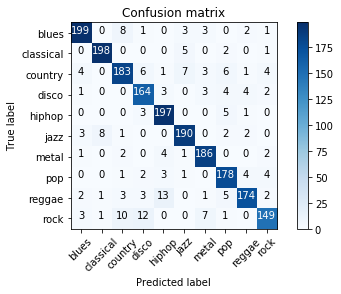

In [90]:
predictions = model.predict(X_test, batch_size=10, verbose=True)
preds = np.argmax(predictions,axis=1)
label = np.argmax(y_test,axis=1)
print(classification_report(label,preds))
cm = confusion_matrix(y_true=label,y_pred=preds)
label = list(unique_labels)
plot_confusion_matrix(cm, label,title='Confusion matrix')